# Analyzing and extending the Diamond and Dybvig model with some insights from Behavioural Economics"
   

### Final assignment for the Course Applied Economic Analysis, 31/01/2017


Name | ANR
------------ | -------------
Ryan Collier | 
Jan Machacek | 
Carlotta Varriale | 608931

# Motivation

We start from the assumptions of the paper by **Diamond and Dybvig** to develop a few extensions to their theoretical model that seem to fit the observed mechanisms of bank runs.
Specifically, we considered that some insights from **Behavioral Economics** that use a hyperbolic discounting factor might help to improve the quality of the standard model on bank runs in predicting depositors' behaviour.
An improved model of bank runs will make it possible for banks and/or policy makers to act in times of financial distress. Moreover, we decided to use **Python** as the main platform to develop our work because it is a great tool to formalize our mathematical formulations and visually explore our results. 
We will begin with a description of the standard model by making ad hoc use of variables and constraints to solve the optimization problem of allocation and consumption in different time periods. We will show that banks provide improved distribution efficiency than autarky, but bank runs equilibria are also possible, which are potential catastrophes and much worse than autarky.
Then, we will run a simple simulation to explore the relationship between number of withdrawals, probability of bank closing and interest rate charged by banks on deposits.(?)
Finally, we introduce the concept of hyperbolic discounting and implement it in the expression of the model,trying to empirically measure the degree of time inconsistency for depositors.

In this part we run a simple simulation.
The original model was written by C. Yenko.

In [88]:
import random
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.graph_objs import *
import math
import sys

In [89]:
interestRate = 0.2
# Some initial interest rate must be set, otherwise the trial would not work. 
maxWithdrawals = 70
# The maximum number of people (out of 100) who may withdraw their money without the bank has to close.
numTrials = 100
# The total number of simulations made; during each of them the bank either close or not.

Then we write the general simulation code.

In [90]:
def runTrial(interestRate,maxWithdrawals,initialInvestment):
        numWithdrawals = 0
        # The initial number of withdrawals is 0. 
        # It increases by 1 with each person who decides during any round to withdraw.
        withdrawParameter = 0
        # This parameter increases with every withdrawal. 
        # Higher the parameter is, higher is the current risk aversion of every person.
        peopleList = []
        for i in range(0,100):
            peopleList.append([random.normalvariate(.5,.5/3),0,i])
        # The People List contains personal data of every person out of 100.
        # [0] The first number is a random risk parameter with mean=0.5 and SD=(0.5/3).
        # [1] The second one determines whether the person has already decided to withdraw (1) or not (0).
        # [2] At the third position is "i" - a number in range 0-99 which serves as a personal ID.
        for roundNum in range (0,3):
        # There are 3 rounds of each simulation, in the Diamond&Dybvig paper described as periods T=0,1,2.
            if numWithdrawals < maxWithdrawals:
            # A condition necessary for each round; if not satisfied the bank has already closed.
                for person in peopleList:
                    if numWithdrawals < maxWithdrawals:
                        if not person[1] == 1:
                        # Check if this person has still her investment in bank.
                        # I.e. this person has not withdrawn in previous rounds.
                            num = random.random()
                            # Return a random number in range [0.0, 1.0).
                            currentRiskAversionParam = person[0]+withdrawParameter-interestRate
                            # It is different for each person because of the random risk parameter.
                            # It also varies between rounds as the withdraw parameter may change.
                            if num < currentRiskAversionParam:
                            # Then this person withdraws.
                                numWithdrawals = numWithdrawals + 1
                                person[1]=1
                                # Ensure this person may not participate in following rounds.
                                withdrawParameter = numWithdrawals/100
                                # So that the parameter is higher for every following person and round.
        if numWithdrawals < maxWithdrawals:
            return 0
        else:
            return 1
        # This loop runs after the whole trial (3 rounds with 100 persons).
        # The trial counts for 1 in case that the bank had to close during it.

In [82]:
x = []
y = []
for inc in range(0,100,1):
        interestRate = float(inc)/100
        # The interest rate gradually increases from 0.00 to 0.99.
        closeSum = 0
        for i in range(0,numTrials):
            closeSum = closeSum + runTrial(interestRate,maxWithdrawals,initialInvestment)
            # This variable sums the total number of trials when the bank had to close.
        fractionClose = float(closeSum)/numTrials
        x.append(interestRate)
        y.append(fractionClose)
        # Both the interest rate and the fraction of closed banks are added to lists representing x and y axis.

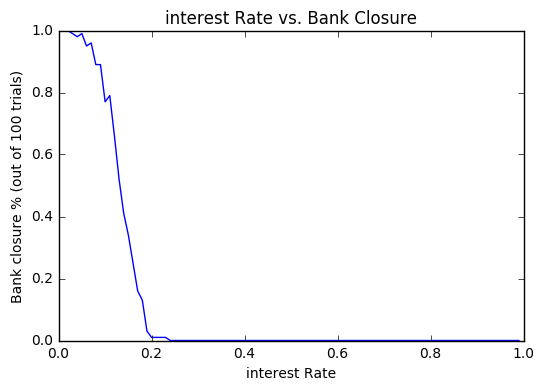

In [83]:
plt.plot(x,y)
plt.xlabel("interest Rate")
plt.ylabel("Bank closure % (out of 100 trials)")
plt.title("interest Rate vs. Bank Closure")
plt.show()

In [100]:
x = []
y = []
for inc in range(0,100,1):
        interestRate = 0.2
        # The interest rate is now fixed again.
        maxWithdrawals = inc
        # The maximum number of withdrawals gradually icreases from 0 to 99.
        closeSum = 0
        for i in range(0,numTrials):
            closeSum = closeSum + runTrial(interestRate,maxWithdrawals,initialInvestment)
        fractionClose = float(closeSum)/numTrials
        x.append(maxWithdrawals)
        y.append(fractionClose)

In [ ]:
plt.plot(x,y)
plt.xlabel("Maximum of withdrawals until closure")
plt.ylabel("Bank closure % (out of 100 trials)")
plt.title("Max Withdrawals vs. Bank Closure")
plt.show()

## Extending the existing model using some insights from behavioural 

So far we explained and simulated the standard Diamond and Dybvig model without making any assumption about the discounting technique used.
Indeed, the authors do not specify the functional form of their discount factor, and we could assume that they use exponential discounting, the standard model which implies consistent preferences over time. Although this is the most commonly used model in economics because of its simplicity, other models have shown to describe the empirical reality better (Frederik et al., 2002). 
Exponential discounting assumes that the marginal rate of substitution between consumption in different time periods is only dependent on the time interval between the two time periods. In other words, the discount rate should be constant over time: 1 / (1+K)t. However, empirical studies such as Thaler (1981) show that often people show time inconsistent tendencies. Most people prefer $50 today to $55 tomorrow while preferring $55 in 366 days to $50 in 365 days. Behavioral economists developed the hyperbolic discounting model to incorporate this human tendency for time inconsistent behavior. In this model, the discounting factor depends on both the length of the delay and on the timing of the delay. As a result, hyperbolic discounting discounts future rewards more than exponential discounting for short delays but less for long delays. This makes it more useful to predict actual human behavior.
As Diamond and Dybvig (1983) pointed out, bank runs can occur due to self-fulfilling expectations of the behavior of other individuals. Hyperbolic discounting and time inconsistent models try to capture the variations in degree of patience across time. 
To get a better empirical description of bank runs it might be beneficial to incorporate the hyperbolic discounting assumption. It might be possible that individuals after learning their type at T=1 still behave contrary to their type.
Our model should be therefore integrated as follows:



Max U(c1;c2) = [tu(c1) + (1 -t)*p*u(c2)]

With
 p=1/1+kD
 
Where k is a parameter that indicates the degree of discounting and D is the number of weeks of delay. This is the hyperbolic discounting factor.
On the other hand, the exponential discounting factor used in time consistent models is 

p'=e^(-kD)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
def hyper_disc(x):
    return(1/(1+x))/(1/(1+x-1))
hyper_disc(1)

0.5

In [3]:
hyper_disc(2)

0.6666666666666666

In [4]:
hyper_disc(12)

0.9230769230769231

In [5]:
hyper_disc(40)

0.975609756097561

In [20]:
from math import exp
def exp_disc(y):
    return exp(-y)/exp(-(y-1))

In [8]:
exp_disc(1)

0.36787944117144233

In [9]:
exp_disc(2)

0.36787944117144233

In [11]:
exp_disc(12)

0.36787944117144233

In [12]:
exp_disc(40)

0.36787944117144233

The discounting factor of next week (n=1) with respect to today(n=0) for the exponential discounting is 
e^(-1)/e(^-0)=1/e
The discounting factor of 12 weeks from now (n=12) with respect to 11 weeks from now (n=11)is 
e^(-12)/e^(-11)=1/e
So this is what we mean by **consistent preferences**: constant delta of discount factor for the same time span (one week)
However, with hyperbolic discounting we can see that the discounting factor of next week with respect to today is 
1/(1+1)/(1/(1)=0,5,
while the discounting factor of 12 weeks from now with respect to 11 weeks is (1/13)/(1/12)=12/13=0,92
This shows that for low Ds, that is for a short time delay, the discounting factor is similar, but as we increase D, the hyperbolic discounting factor tends to 1, so the present value of a reward in the far future is almost zero according to **hyperbolic discounting**.

| weeks | d_exp | d_hyper |
|-------|-------|---------|
| 1     | 0,367 | 0,5     |
| 2     | 0,367 | 0,66    |
| 12    | 0,367 | 0,923   |
| 40    | 0,367 | 0,975   |




In [22]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.01, 5.0, 0.01)

y = exp(-x)

fig, ax = plt.subplots()
plt.xlim(5, 0)
ax.plot(x, y)
plt.xlabel('decreasing time (x)')
plt.ylabel('present value')
plt.title('exponential discounting')
plt.grid(True)

TypeError: only length-1 arrays can be converted to Python scalars

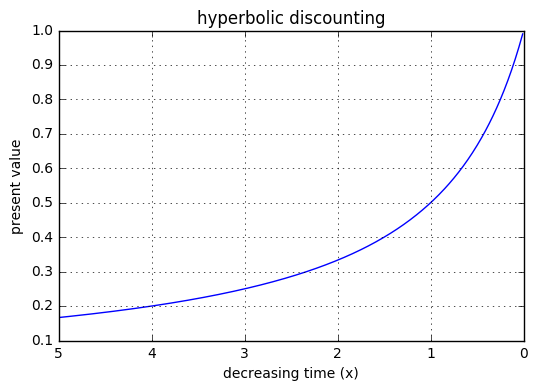

In [15]:
x = np.arange(0.01, 5.0, 0.01)

y = 1/(1+x)

fig, ax = plt.subplots()
plt.xlim(5, 0)
ax.plot(x, y)
plt.xlabel('decreasing time (x)')
plt.ylabel('present value')
plt.title('hyperbolic discounting')
plt.grid(True)

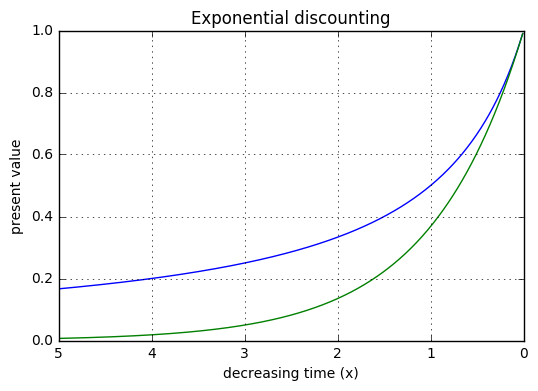

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.01, 5.0, 0.01)

# calculate the y value for each element of the x vector
y = 1/(1+x)

fig, ax = plt.subplots()
plt.xlim(5, 0)
ax.plot(x, y)
plt.xlabel('decreasing time (x)')
plt.ylabel('present value')
plt.title('hyperbolic discounting')
plt.grid(True)

x = np.arange(0.01, 5.0, 0.01)
y = np.exp(-x)
plt.plot(x, y)

plt.xlim(5, 0) 

plt.xlabel('decreasing time (x)')
plt.ylabel('present value')
plt.title('Exponential discounting')
plt.grid(True)


In order to exploit this intuition in relation to bank runs, we decided to run a simple survey, which consisted of two questions/two scenarios.
1)
You deposited 100 $ in a bank. You hear now rumors that the bank could have liquidity problems in one month from now. You decide to:
Do nothing and keep your funds in the bank
Withdraw your funds now

2) 
You deposited 100 $ in a bank. You hear now rumors that in 11 months the bank could have liquidity problems in 12 months from now. 
You decide to:
Do nothing and keep your funds in the bank
Withdraw your funds now

If inconsistent time-impatient individuals tend to have a lower discount factor (higher discount rate) for close future than for far events, we could expect that more people change their decisions and decide to withdraw their savings in the first scenario than in the second scenario.


In relation to time inconsistency and savings, sometimes people anticipate that they might have time inconsistent behavior and try to insure against it in time 0, for example by keeping their savings in a place that is difficult to reach.
 In this light, making deposits illiquid by suspending convertibility could therefore be an effective and advisable measure.
 Indeed, it would serve not only a shelter for financial institutions to avoid bank runs, but it would have the double effect of preventing customers from their own “temptation” to inconsistently revise their decisions and withdraw their funds before they committed to. 
